# Importando bibliotecas e o dataset

## Importando bibliotecas

In [105]:
import numpy as np
import pandas as pd
np.random.seed(0) # for reproducibility

## Importando os dados

In [106]:
chess_games = pd.read_csv("https://raw.githubusercontent.com/Vinicius-resende-cin/intro-dados/master/data/chess_games.csv", encoding = "ISO-8859-1")

In [107]:
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


# Definição de tipos

In [108]:
# verificando os tipos de todas as colunas
chess_games.dtypes

id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

Primeiro, as colunas relacionadas ao tempo de início e fim serão convertidas em uma única coluna com a duração da partida.

In [109]:
# convertendo para datetime format
chess_games['created_at'] = pd.to_datetime(chess_games['created_at'], unit='ms', origin='unix')
chess_games['last_move_at'] = pd.to_datetime(chess_games['last_move_at'], unit='ms', origin='unix')

In [110]:
chess_games['duration_sec'] = chess_games['last_move_at'] - chess_games['created_at']
chess_games['duration_sec'] = chess_games['duration_sec'].dt.total_seconds()

In [111]:
# as colunas originais de tempo serão removidas
chess_games = chess_games.drop(columns=['created_at', 'last_move_at'])

In [112]:
chess_games.head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration_sec
0,TZJHLljE,False,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,0.0
1,l1NXvwaE,True,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,0.0
2,mIICvQHh,True,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,0.0
3,kWKvrqYL,True,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,0.0
4,9tXo1AUZ,True,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,0.0


In [113]:
# convertendo 'object' para 'category'
chess_games['id'] = chess_games['id'].astype('category')
chess_games['victory_status'] = chess_games['victory_status'].astype('category')
chess_games['winner'] = chess_games['winner'].astype('category')
chess_games['increment_code'] = chess_games['increment_code'].astype('category')
chess_games['white_id'] = chess_games['white_id'].astype('category')
chess_games['black_id'] = chess_games['black_id'].astype('category')
chess_games['moves'] = chess_games['moves'].astype('category')
chess_games['opening_eco'] = chess_games['opening_eco'].astype('category')
chess_games['opening_name'] = chess_games['opening_name'].astype('category')

# convertendo categorico para numérico
chess_games['id'] = chess_games['id'].cat.codes
chess_games['victory_status'] = chess_games['victory_status'].cat.codes
chess_games['winner'] = chess_games['winner'].cat.codes
chess_games['increment_code'] = chess_games['increment_code'].cat.codes
chess_games['white_id'] = chess_games['white_id'].cat.codes
chess_games['black_id'] = chess_games['black_id'].cat.codes
chess_games['moves'] = chess_games['moves'].cat.codes
chess_games['opening_eco'] = chess_games['opening_eco'].cat.codes
chess_games['opening_name'] = chess_games['opening_name'].cat.codes

In [114]:
# verificando novos tipos
chess_games.dtypes

id                  int16
rated                bool
turns               int64
victory_status       int8
winner               int8
increment_code      int16
white_id            int16
white_rating        int64
black_id            int16
black_rating        int64
moves               int16
opening_eco         int16
opening_name        int16
opening_ply         int64
duration_sec      float64
dtype: object

In [115]:
chess_games.head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration_sec
0,9068,False,13,2,2,110,1287,1500,11,1191,4524,248,1387,5,0.0
1,14512,True,16,3,0,298,16,1322,7748,1261,1987,71,750,4,0.0
2,14904,True,61,1,2,298,3823,1496,11,1500,16383,171,650,3,0.0
3,14350,True,61,1,2,187,2017,1439,134,1454,3770,241,992,3,0.0
4,3091,True,95,1,2,247,6056,1523,134,1469,15622,192,783,5,0.0


# Tratamento de dados duplicados

## Verificando se há dados duplicados

Como um mesmo jogo pode acontecer mais de uma vez, serão considerados duplicados os jogos que possuem o mesmo id.

In [116]:
duplicated_games = chess_games.duplicated(keep=False, subset=['id'])

In [117]:
chess_games[duplicated_games].sort_values(by='id').head(6)

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration_sec
11279,30,True,66,0,1,26,2795,1630,8822,1584,17286,152,352,3,887.434
10570,30,True,66,0,1,26,2795,1630,8822,1584,17286,152,352,3,887.434
12208,37,True,32,3,0,19,9071,1448,6546,1436,4148,241,931,4,235.773
720,37,True,32,3,0,19,9071,1448,6546,1436,4148,241,931,4,0.000
3882,40,True,35,1,2,236,1664,1259,3636,1319,14968,193,777,4,10000.000
18642,40,True,35,1,2,236,1664,1259,3636,1319,14968,193,777,4,515.314


In [118]:
# tamanho antes da remoção de dados duplicados
chess_games.shape

(20058, 15)

## Remoção de dados duplicados

In [119]:
chess_games.drop_duplicates(inplace=True, subset=['id'])

In [120]:
chess_games.shape

(19113, 15)

# Tratamento de dados ausentes

In [121]:
chess_games.shape

(19113, 15)

In [122]:
# verificando se há dados ausentes
print(chess_games.isnull().sum())

id                0
rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
duration_sec      0
dtype: int64


O dataset selecionado não contém dados ausentes, portanto será feita uma remoção aleatória de dados para que possa ser realizada uma imputação em seguida

## Normalização

Antes de realizar a imputação, é necessário normalizar os dados para que a imputação seja feita de forma correta. Apenas as colunas que se referem aos ratings dos jogadores serão utilizadas.

In [123]:
chess_games_norm = chess_games.copy()

In [124]:
# normalização entre 0 e 1
chess_games_norm['white_rating'] = (chess_games['white_rating'] - chess_games['white_rating'].min()) \
    / (chess_games['white_rating'].max() - chess_games['white_rating'].min())
chess_games_norm['black_rating'] = (chess_games['black_rating'] - chess_games['black_rating'].min()) \
    / (chess_games['black_rating'].max() - chess_games['black_rating'].min())

In [125]:
chess_games_norm[['white_rating', 'black_rating']].describe()

,white_rating,black_rating
count,19113.000000,19113.000000
mean,0.424478,0.414191
std,0.151369,0.150177
min,0.000000,0.000000
25%,0.322025,0.312823
50%,0.408664,0.400207
75%,0.526096,0.514995
max,1.000000,1.000000


## Remoção de dados

In [126]:
# gerando indices aleatórios
random_indices_white_rating = np.random.choice(chess_games.index, size=int(len(chess_games)*0.05), replace=False)
random_indices_black_rating = np.random.choice(chess_games.index, size=int(len(chess_games)*0.05), replace=False)

# substituindo valores por NaN
chess_games2 = chess_games_norm.copy()
chess_games2.loc[random_indices_white_rating, ['white_rating']] = np.nan
chess_games2.loc[random_indices_black_rating, ['black_rating']] = np.nan

In [127]:
chess_games2.isnull().sum()

id                  0
rated               0
turns               0
victory_status      0
winner              0
increment_code      0
white_id            0
white_rating      955
black_id            0
black_rating      955
moves               0
opening_eco         0
opening_name        0
opening_ply         0
duration_sec        0
dtype: int64

## Imputação de dados

### Usando a média

In [128]:
chess_games_mean_fill = chess_games2.copy()

In [129]:
print("white_rating")
print("mean:", chess_games_mean_fill['white_rating'].mean())
print("median:", chess_games_mean_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_mean_fill['black_rating'].mean())
print("median:", chess_games_mean_fill['black_rating'].median())

white_rating
mean: 0.42429824980954695
median: 0.40866388308977036

black_rating
mean: 0.4143820364346374
median: 0.40020682523267836


In [130]:
chess_games_mean_fill['white_rating'].fillna(chess_games2['white_rating'].mean(), inplace=True)
chess_games_mean_fill['black_rating'].fillna(chess_games2['black_rating'].mean(), inplace=True)

In [131]:
chess_games_mean_fill.isnull().sum()

id                0
rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
duration_sec      0
dtype: int64

In [132]:
print("white_rating")
print("mean:", chess_games_mean_fill['white_rating'].mean())
print("median:", chess_games_mean_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_mean_fill['black_rating'].mean())
print("median:", chess_games_mean_fill['black_rating'].median())

white_rating
mean: 0.42429824980954695
median: 0.4196242171189979

black_rating
mean: 0.41438203643463734
median: 0.41003102378490175


Quando a média é utilizada, o seu valor é alterado, além de afetar o valor da mediana, deslocando-a para um valor mais próximo do seu próprio.

### Usando a mediana

In [133]:
chess_games_median_fill = chess_games2.copy()

In [134]:
print("white_rating")
print("mean:", chess_games_median_fill['white_rating'].mean())
print("median:", chess_games_median_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_median_fill['black_rating'].mean())
print("median:", chess_games_median_fill['black_rating'].median())

white_rating
mean: 0.42429824980954695
median: 0.40866388308977036

black_rating
mean: 0.4143820364346374
median: 0.40020682523267836


In [135]:
chess_games_median_fill['white_rating'].fillna(chess_games2['white_rating'].median(), inplace=True)
chess_games_median_fill['black_rating'].fillna(chess_games2['black_rating'].median(), inplace=True)

In [136]:
chess_games_median_fill.isnull().sum()

id                0
rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
duration_sec      0
dtype: int64

In [137]:
print("white_rating")
print("mean:", chess_games_median_fill['white_rating'].mean())
print("median:", chess_games_median_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_median_fill['black_rating'].mean())
print("median:", chess_games_median_fill['black_rating'].median())

white_rating
mean: 0.42351706317127
median: 0.40866388308977036

black_rating
mean: 0.4136737579489014
median: 0.40020682523267836


Quando a mediana é utilizada, o seu valor se mantém e o valor da média é levemente alterado, sem apresentar um grande impacto nas estatísticas originais.

### Usando um valor aleatório

In [138]:
chess_games_random_fill = chess_games2.copy()

In [139]:
print("white_rating")
print("mean:", chess_games_random_fill['white_rating'].mean())
print("median:", chess_games_random_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_random_fill['black_rating'].mean())
print("median:", chess_games_random_fill['black_rating'].median())

white_rating
mean: 0.42429824980954695
median: 0.40866388308977036

black_rating
mean: 0.4143820364346374
median: 0.40020682523267836


In [140]:
# imputando valores aleatórios
import random
random.seed(0) # for reproducibility
chess_games_random_fill['white_rating'].fillna(random.randint(chess_games2['white_rating'].min(), chess_games2['white_rating'].max()), inplace=True)
chess_games_random_fill['black_rating'].fillna(random.randint(chess_games2['black_rating'].min(), chess_games2['black_rating'].max()), inplace=True)

In [141]:
chess_games_random_fill.isnull().sum()

id                0
rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
duration_sec      0
dtype: int64

In [142]:
print("white_rating")
print("mean:", chess_games_random_fill['white_rating'].mean())
print("median:", chess_games_random_fill['white_rating'].median(), end='\n\n')

print("black_rating")
print("mean:", chess_games_random_fill['black_rating'].mean())
print("median:", chess_games_random_fill['black_rating'].median())

white_rating
mean: 0.45306375870045273
median: 0.4196242171189979

black_rating
mean: 0.44364301876106027
median: 0.41003102378490175


A utilização de valores aleatórios se mostra uma opção ruim para a imputação de dados, pois pode distorcer as estatísticas originais do dataset, perdendo assim informações importantes.

### Usando um preditor KNN

In [143]:
chess_games_knn_fill = chess_games2.copy()

#### Executando o KNN

In [144]:
%pip install fancyimpute

Note: you may need to restart the kernel to use updated packages.


In [145]:
from fancyimpute import KNN
chess_games_knn = KNN(k=3).fit_transform(chess_games_knn_fill)

Imputing row 1/19113 with 0 missing, elapsed time: 75.890
Imputing row 101/19113 with 0 missing, elapsed time: 75.892
Imputing row 201/19113 with 0 missing, elapsed time: 75.893
Imputing row 301/19113 with 1 missing, elapsed time: 75.894
Imputing row 401/19113 with 0 missing, elapsed time: 75.895
Imputing row 501/19113 with 0 missing, elapsed time: 75.896
Imputing row 601/19113 with 0 missing, elapsed time: 75.897
Imputing row 701/19113 with 0 missing, elapsed time: 75.897
Imputing row 801/19113 with 0 missing, elapsed time: 75.899
Imputing row 901/19113 with 0 missing, elapsed time: 75.900
Imputing row 1001/19113 with 0 missing, elapsed time: 75.901
Imputing row 1101/19113 with 0 missing, elapsed time: 75.901
Imputing row 1201/19113 with 0 missing, elapsed time: 75.902
Imputing row 1301/19113 with 0 missing, elapsed time: 75.903
Imputing row 1401/19113 with 0 missing, elapsed time: 75.903
Imputing row 1501/19113 with 0 missing, elapsed time: 75.904
Imputing row 1601/19113 with 0 missi

In [146]:
chess_games_knn_fill = pd.DataFrame(chess_games_knn, columns=chess_games_knn_fill.columns, index=chess_games_knn_fill.index)

In [147]:
chess_games_knn_fill.head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration_sec
0,9068.0,0.0,13.0,2.0,2.0,110.0,1287.0,0.373695,11.0,0.207859,4524.0,248.0,1387.0,5.0,0.0
1,14512.0,1.0,16.0,3.0,0.0,298.0,16.0,0.280793,7748.0,0.244054,1987.0,71.0,750.0,4.0,0.0
2,14904.0,1.0,61.0,1.0,2.0,298.0,3823.0,0.371608,11.0,0.367632,16383.0,171.0,650.0,3.0,0.0
3,14350.0,1.0,61.0,1.0,2.0,187.0,2017.0,0.341858,134.0,0.343847,3770.0,241.0,992.0,3.0,0.0
4,3091.0,1.0,95.0,1.0,2.0,247.0,6056.0,0.385699,134.0,0.351603,15622.0,192.0,783.0,5.0,0.0


In [148]:
chess_games_knn_fill.isnull().sum()

id                0
rated             0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
duration_sec      0
dtype: int64

In [149]:
chess_games_knn_fill[['white_rating', 'black_rating']].describe()

,white_rating,black_rating
count,19113.000000,19113.000000
mean,0.424095,0.414142
std,0.149173,0.147979
min,0.000000,0.000000
25%,0.324113,0.315926
50%,0.409186,0.400724
75%,0.522965,0.510858
max,1.000000,1.000000


O uso do KNN para imputação de dados é uma boa opção, pois ele é capaz de prever valores ausentes com base em valores próximos, sem distorcer as estatísticas originais do dataset.

#### Verificando o erro do modelo KNN

In [150]:
target_white = chess_games_norm.loc[random_indices_white_rating, ['white_rating']]
target_black = chess_games_norm.loc[random_indices_black_rating, ['black_rating']]
pred_white = chess_games_knn_fill.loc[random_indices_white_rating, ['white_rating']]
pred_black = chess_games_knn_fill.loc[random_indices_black_rating, ['black_rating']]

from sklearn.metrics import mean_absolute_percentage_error
white_error = mean_absolute_percentage_error(target_white, pred_white)
black_error = mean_absolute_percentage_error(target_black, pred_black)

print("white_rating")
print("MAPE:", white_error, end='\n\n')

print("black_rating")
print("MAPE:", black_error, end='\n\n')

print("Mean MAPE:", (white_error + black_error) / 2)

white_rating
MAPE: 0.38350063123869643

black_rating
MAPE: 0.45066216710229345

Mean MAPE: 0.4170813991704949


In [151]:
chess_games_norm[['white_rating', 'black_rating']].describe()

,white_rating,black_rating
count,19113.000000,19113.000000
mean,0.424478,0.414191
std,0.151369,0.150177
min,0.000000,0.000000
25%,0.322025,0.312823
50%,0.408664,0.400207
75%,0.526096,0.514995
max,1.000000,1.000000


In [152]:
chess_games_knn_fill[['white_rating', 'black_rating']].describe()

,white_rating,black_rating
count,19113.000000,19113.000000
mean,0.424095,0.414142
std,0.149173,0.147979
min,0.000000,0.000000
25%,0.324113,0.315926
50%,0.409186,0.400724
75%,0.522965,0.510858
max,1.000000,1.000000


De acordo com os resultados obtidos, o modelo KNN apresentou um erro médio em torno de 41%, um valor bastante alto, mas sua distribuição compensou a variação das estatísticas, mantendo-as próximas das originais do dataset.

# Remoção de outliers

## Univariado

Partidas com muitos ou poucos turnos podem ser consideradas outliers, pois fogem do padrão de uma partida normal. Portanto, será usado o método de Tukey para identificar e remover esses outliers.

<Axes: >

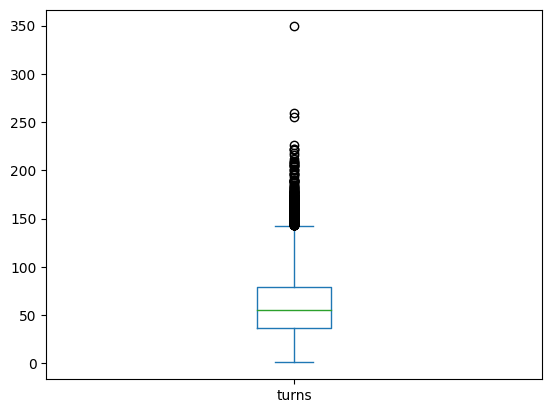

In [153]:
# verificando o boxplot antes da remoção de outliers
chess_games['turns'].plot.box()

A partir da análise do boxplot, é possível identificar outliers com muitos turnos, que serão removidos.

<Axes: >

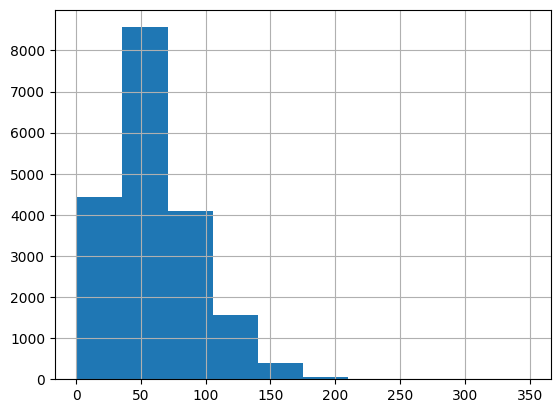

In [154]:
# verificando a distribuição dos dados
chess_games['turns'].hist()

Os dados possuem uma distribuição próxima à normal, com algumas ocorrências muito acima das estatísticas centrais.

In [155]:
chess_games['turns'].describe()

count    19113.000000
mean        60.513839
std         33.488264
min          1.000000
25%         37.000000
50%         55.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

Agora que a distribuição dos dados está mais próxima de uma distribuição normal, será aplicado o método de Tukey para identificar e remover os outliers.

In [156]:
# definição dos quantis e do IQR
q1 = chess_games['turns'].quantile(0.25)
q3 = chess_games['turns'].quantile(0.75)
iqr = q3 - q1
print(iqr)

42.0


In [157]:
# outliers inferiores
chess_games[chess_games['turns'] < (q1 - 1.5 * iqr)].shape

(0, 15)

In [158]:
# outliers superiores
chess_games[chess_games['turns'] > (q3 + 1.5 * iqr)].shape

(412, 15)

<Axes: >

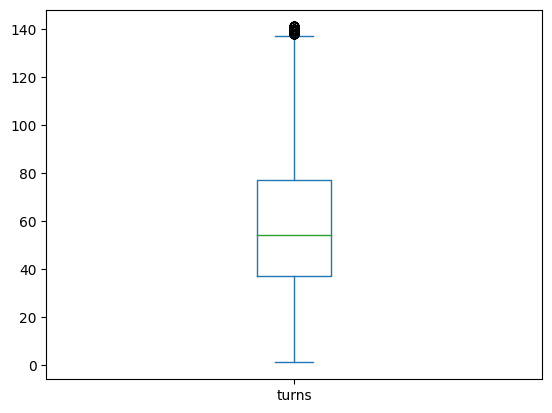

In [159]:
# removendo os outliers
chess_games_turns = chess_games[(chess_games['turns'] > (q1 - 1.5 * iqr)) & (chess_games['turns'] < (q3 + 1.5 * iqr))]
chess_games_turns['turns'].plot.box()

## Bivariado

Nessa seção será analisada a relação entre os ratings dos jogadores. Partidas com uma diferença muito grande entre esses ratings podem ser consideradas outliers.

<Axes: xlabel='white_rating', ylabel='black_rating'>

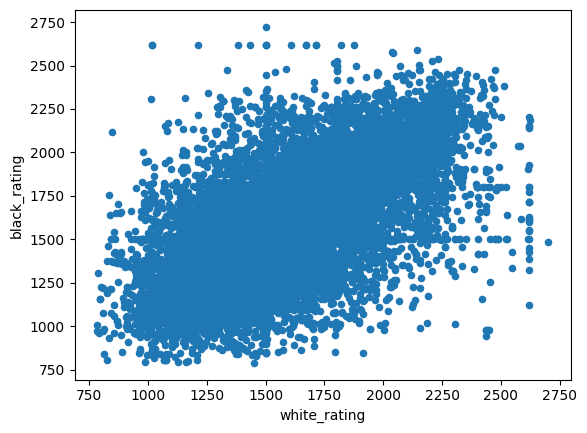

In [160]:
chess_games.plot.scatter(x='white_rating', y='black_rating')

In [161]:
chess_games_rating = chess_games.copy()
chess_games_rating['rating_diff'] = abs(chess_games['white_rating'] - chess_games['black_rating'])
chess_games_rating[['white_rating', 'black_rating', 'rating_diff']].head()

,white_rating,black_rating,rating_diff
0,1500,1191,309
1,1322,1261,61
2,1496,1500,4
3,1439,1454,15
4,1523,1469,54


In [162]:
chess_games_rating['rating_diff'].describe()

count    19113.000000
mean       172.336786
std        177.702696
min          0.000000
25%         46.000000
50%        115.000000
75%        240.000000
max       1605.000000
Name: rating_diff, dtype: float64

<Axes: >

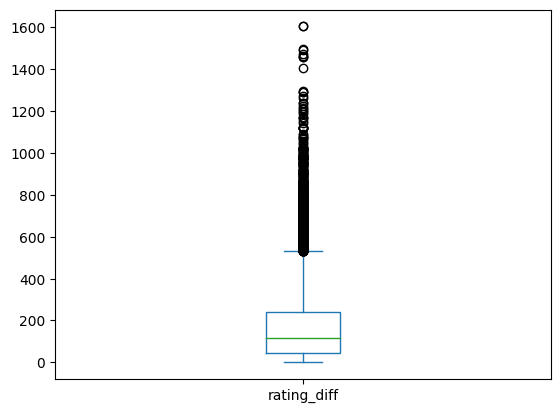

In [163]:
chess_games_rating['rating_diff'].plot.box()

<Axes: >

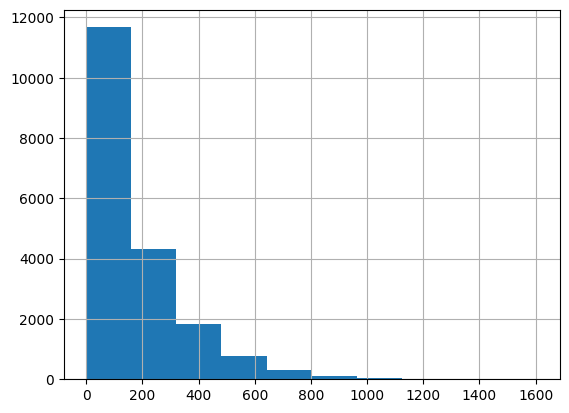

In [164]:
chess_games_rating['rating_diff'].hist()

Nesse caso específico, diferenças muito baixas não são consideradas outliers, mas um comportamento esperado. Sendo assim, apenas pontos com diferenças muito altas serão removidos. Dessa forma, valores acima de `q3 + 1.5 * IQR` serão considerados outliers.

In [165]:
q1 = chess_games_rating['rating_diff'].quantile(0.25)
q3 = chess_games_rating['rating_diff'].quantile(0.75)
iqr = q3 - q1

<Axes: >

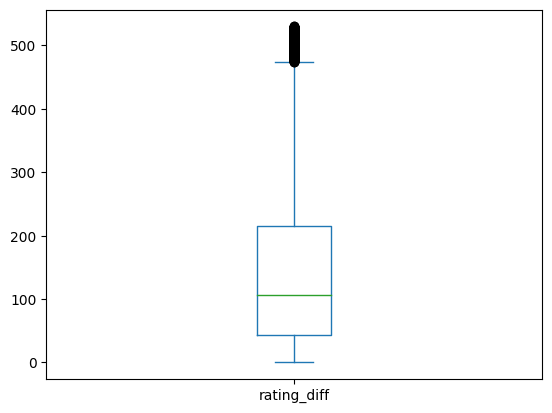

In [166]:
chess_games_rating = chess_games_rating[chess_games_rating['rating_diff'] < (q3 + 1.5 * iqr)]
chess_games_rating['rating_diff'].plot.box()

<Axes: xlabel='white_rating', ylabel='black_rating'>

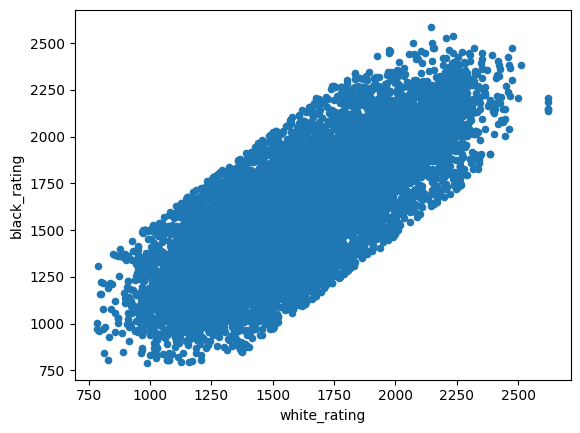

In [167]:
chess_games_rating.plot.scatter(x='white_rating', y='black_rating')

## Multivariado

### Elliptic Envelope

In [168]:
chess_games.dtypes

id                  int16
rated                bool
turns               int64
victory_status       int8
winner               int8
increment_code      int16
white_id            int16
white_rating        int64
black_id            int16
black_rating        int64
moves               int16
opening_eco         int16
opening_name        int16
opening_ply         int64
duration_sec      float64
dtype: object

In [169]:
from sklearn.covariance import EllipticEnvelope
detector = EllipticEnvelope(contamination=0.01)
detector.fit(chess_games)

EllipticEnvelope(contamination=0.01)

In [170]:
scores = detector.predict(chess_games)

In [171]:
chess_games['outlier'] = scores

In [172]:
# outliers
chess_games[chess_games['outlier'] == -1].head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration_sec,outlier
14,17302,False,31,1,2,108,7667,1094,8057,1141,13274,201,297,8,10000.0,-1
43,15679,False,66,3,2,284,6869,2443,7656,978,8797,133,1240,17,10000.0,-1
49,13839,False,41,1,2,284,6869,2436,7656,978,10919,72,1141,4,10000.0,-1
52,6393,False,53,1,2,19,7667,978,5086,1500,6113,61,191,2,10000.0,-1
54,7784,True,8,3,2,128,9093,1521,3247,1162,626,4,1469,2,10000.0,-1


Os outliers encontrados parecem ser partidas onde o jogador com maior rating perdeu para o jogador com menor rating, ou partidas com uma diferença muito grande entre os ratings que duram muitos turnos.

In [173]:
chess_games.shape

(19113, 16)

In [174]:
chess_games_elliptic = chess_games[chess_games['outlier'] != -1]
chess_games_elliptic.shape

(18921, 16)

Após a execução do método Elliptic Envelope, foi possível identificar um pequeno número de outliers.

### Isolation Forest

In [175]:
chess_games.drop(columns=['outlier'], inplace=True)
chess_games.dtypes

id                  int16
rated                bool
turns               int64
victory_status       int8
winner               int8
increment_code      int16
white_id            int16
white_rating        int64
black_id            int16
black_rating        int64
moves               int16
opening_eco         int16
opening_name        int16
opening_ply         int64
duration_sec      float64
dtype: object

In [176]:
from sklearn.ensemble import IsolationForest
rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(chess_games)

IsolationForest(max_samples=100,
                random_state=RandomState(MT19937) at 0x7F3C0BBFF140)

In [177]:
scores = clf.predict(chess_games)

In [178]:
chess_games['outliers'] = scores

In [179]:
# outliers
chess_games[chess_games['outliers'] == -1].head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration_sec,outliers
0,9068,False,13,2,2,110,1287,1500,11,1191,4524,248,1387,5,0.0,-1
1,14512,True,16,3,0,298,16,1322,7748,1261,1987,71,750,4,0.0,-1
5,7069,False,5,0,1,19,8568,1250,3065,1002,8205,96,1292,4,0.0,-1
7,8463,False,9,3,0,114,2023,1413,7866,2108,6811,71,752,5,0.0,-1
10,5465,False,39,1,2,205,2023,1381,517,1272,6607,0,1433,1,0.0,-1


As causas dos outliers identificados pelo Isolation Forest são as mesmas identificadas pelo Elliptic Envelope, mas o Isolation Forest parece ser mais sensível às inconsistências dos dados.

In [180]:
chess_games.shape

(19113, 16)

In [181]:
chess_games_isolation = chess_games[chess_games['outliers'] != -1]
chess_games_isolation.shape

(11212, 16)

Após a execução do método Isolation Forest, foi possível identificar um número muito maior de outliers do que o método anterior.

In [182]:
# remoção dos outliers detectados pelo Elliptic Envelope
chess_games = chess_games.loc[chess_games_elliptic.index]

# Discretização

A base de dados apresenta em sua maioria dados discretos, com excessão da coluna que representa a duração das partidas. Portanto, a discretização será feita apenas a essa coluna.

In [183]:
chess_games['duration_sec'].describe()

count    18921.000000
mean       734.605445
std       1772.437520
min          0.000000
25%          0.000000
50%        179.543000
75%        761.361000
max      10351.034000
Name: duration_sec, dtype: float64

## Remoção de dados incorretos

Analisando a distribuição dos dados, é possível identificar que grande parte dos jogos possuem uma duração de 0 segundos, indicando um problema nos dados. Esses valores serão removidos.

In [184]:
chess_games = chess_games[chess_games['duration_sec'] > 0]

<Axes: xlabel='id', ylabel='duration_sec'>

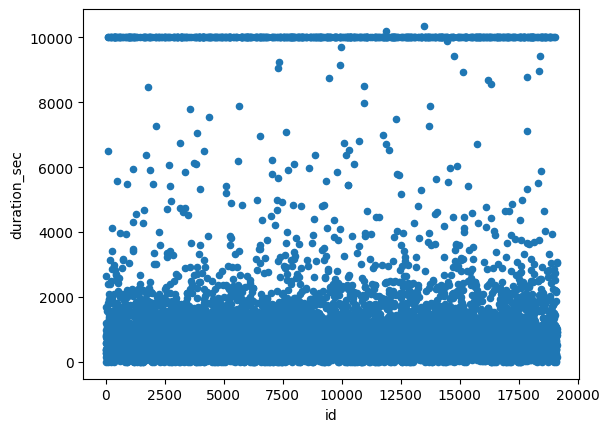

In [185]:
chess_games.plot.scatter(x='id', y='duration_sec')

Mesmo após a remoção de jogos com duração 0, ainda é possível identificar um problema: há muitos jogos com a duração de extamanete 10000 segundos. Como isso pode indicar um problema, esses valores também serão removidos.

In [186]:
chess_games = chess_games[chess_games['duration_sec'] != 10000]

<Axes: xlabel='id', ylabel='duration_sec'>

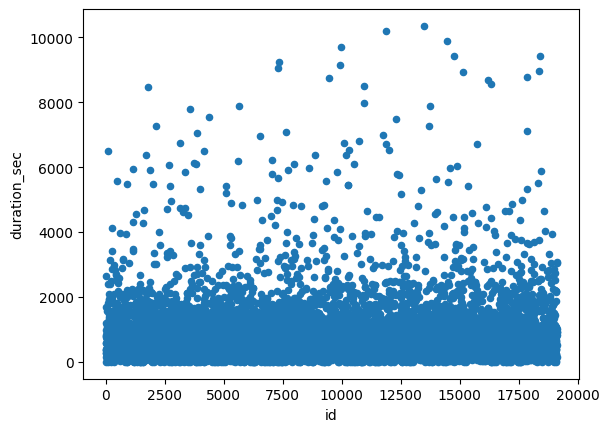

In [187]:
chess_games.plot.scatter(x='id', y='duration_sec')

In [188]:
chess_games['duration_sec'].describe()

count     9836.000000
mean       851.918424
std        862.118034
min          1.922000
25%        383.972750
50%        664.616500
75%       1022.917250
max      10351.034000
Name: duration_sec, dtype: float64

## Discretização da duração das partidas

Com os dados problemáticos removidos, a discretização pode então ser feita.

In [82]:
# discretizando bins com mesmo intervalo
chess_games_duration_dist = pd.cut(chess_games['duration_sec'], 4)

<Axes: ylabel='duration_sec'>

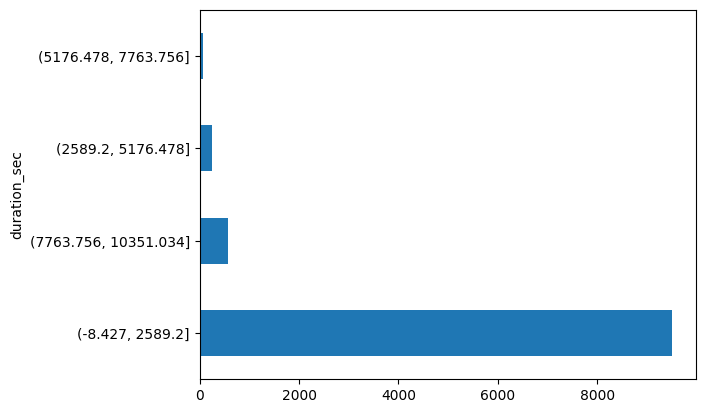

In [83]:
chess_games_duration_dist.value_counts().plot(kind='barh')

Por conta da distribuição extremamente desigual dos dados, dividir em intervalos iguais não é uma boa opção. Portanto, será feita a discretização em intervalos baseados nos quartis dos dados.

In [84]:
# discretizando bins baseado nos quartis
chess_games_duration_dist = pd.qcut(chess_games['duration_sec'], 4, duplicates='drop')

<Axes: ylabel='duration_sec'>

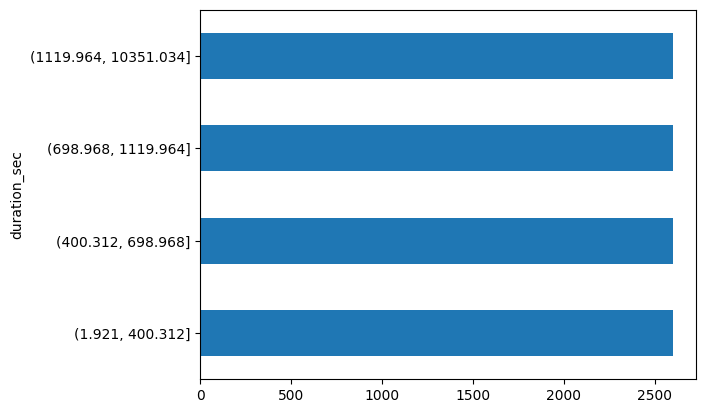

In [85]:
chess_games_duration_dist.value_counts().plot(kind='barh')

In [86]:
chess_games.head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration_sec,outliers
77,15690,True,48,3,2,236,8228,1720,6281,1579,17430,152,334,3,10000.0,-1
91,18730,True,69,3,2,189,2526,1603,6281,1550,17076,152,363,3,10000.0,-1
100,11585,True,101,3,2,19,7322,1942,864,1739,17741,162,357,6,10000.0,-1
113,2330,True,111,1,2,102,3402,1729,1557,1795,4850,265,907,5,10000.0,-1
125,17637,True,66,1,0,108,7420,1210,442,1280,8196,98,1310,4,10000.0,-1


# Estatísticas Descritivas

Para tornar a análise mais compreensível, os dados serão transformados novamente para categóricos. Os outliers identificados anteriormente serão removidos.

In [189]:
chess_games = pd.read_csv("https://raw.githubusercontent.com/Vinicius-resende-cin/intro-dados/master/data/chess_games.csv", encoding = "ISO-8859-1")

In [190]:
# convertendo 'object' para 'category'
chess_games['id'] = chess_games['id'].astype('category')
chess_games['victory_status'] = chess_games['victory_status'].astype('category')
chess_games['winner'] = chess_games['winner'].astype('category')
chess_games['increment_code'] = chess_games['increment_code'].astype('category')
chess_games['white_id'] = chess_games['white_id'].astype('category')
chess_games['black_id'] = chess_games['black_id'].astype('category')
chess_games['moves'] = chess_games['moves'].astype('category')
chess_games['opening_eco'] = chess_games['opening_eco'].astype('category')
chess_games['opening_name'] = chess_games['opening_name'].astype('category')

# o id será mantido como numérico
chess_games['id'] = chess_games['id'].cat.codes

In [191]:
# convertendo para datetime format
chess_games['created_at'] = pd.to_datetime(chess_games['created_at'], unit='ms', origin='unix')
chess_games['last_move_at'] = pd.to_datetime(chess_games['last_move_at'], unit='ms', origin='unix')

In [192]:
chess_games['duration_sec'] = chess_games['last_move_at'] - chess_games['created_at']
chess_games['duration_sec'] = chess_games['duration_sec'].dt.total_seconds()

In [193]:
chess_games.drop(columns=['created_at', 'last_move_at'], inplace=True)

In [194]:
chess_games.dtypes

id                   int16
rated                 bool
turns                int64
victory_status    category
winner            category
increment_code    category
white_id          category
white_rating         int64
black_id          category
black_rating         int64
moves             category
opening_eco       category
opening_name      category
opening_ply          int64
duration_sec       float64
dtype: object

In [195]:
chess_games.shape

(20058, 15)

In [196]:
# remoção dos outliers detectados pelo Elliptic Envelope
chess_games = chess_games.loc[chess_games_elliptic.index]
chess_games.shape

(18921, 15)

Os dados incorretos identificados anteriormente também serão removidos.

In [198]:
chess_games = chess_games[(chess_games['duration_sec'] > 0) & (chess_games['duration_sec'] != 10000)]
chess_games.shape

(9836, 15)

In [199]:
chess_games.head()

,id,rated,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,duration_sec
9288,4926,False,50,mate,black,19+30,arfhan,1265,lasttry,1500,d4 d5 Nc3 Nf6 Nf3 e6 e4 dxe4 Ne5 c5 Bg5 cxd4 N...,D01,Queen's Pawn Game: Chigorin Variation,4,916.013
9289,16218,False,30,mate,black,19+30,lasttry,1500,arfhan,1265,e4 e5 Nf3 Nf6 Nc3 Nc6 d4 d5 dxe5 dxe4 exf6 exf...,C47,Four Knights Game: Scotch Variation,7,885.794
9290,8791,False,50,mate,black,19+30,arfhan,1265,lasttry,1500,e3 e5 Nf3 Nc6 h4 Nf6 Bc4 d5 Bd3 e4 Bb5 exf3 gx...,A00,Van't Kruijs Opening,1,811.024
9291,15338,True,10,outoftime,black,8+0,spitfire999,1099,alin86,1574,e4 d5 c3 dxe4 a4 Nf6 h4 Bg4 Qb3 b6,B01,Scandinavian Defense,2,510.205
9292,13794,True,21,mate,white,8+4,olivia77,1459,spitfire999,1143,e4 e5 Nf3 Nf6 Nxe5 Nxe4 Qf3 Ke7 Qxf7+ Kd6 Nc4+...,C42,Russian Game: Damiano Variation,6,200.445


In [200]:
chess_games.describe()

,id,turns,white_rating,black_rating,opening_ply,duration_sec
count,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000,9836.000000
mean,9608.834282,61.388878,1621.268402,1614.081537,4.930968,851.918424
std,5522.975865,34.133009,286.325750,284.963528,2.923045,862.118034
min,0.000000,1.000000,784.000000,789.000000,1.000000,1.922000
25%,4886.750000,38.000000,1436.000000,1431.000000,3.000000,383.972750
50%,9607.500000,56.000000,1596.500000,1591.000000,4.000000,664.616500
75%,14393.250000,80.000000,1809.000000,1802.000000,6.000000,1022.917250
max,19112.000000,349.000000,2700.000000,2621.000000,28.000000,10351.034000


## Comportamento de turnos para as partidas

In [97]:
chess_games['turns'].describe()

count    18921.000000
mean        60.738597
std         33.533347
min          1.000000
25%         37.000000
50%         56.000000
75%         79.000000
max        349.000000
Name: turns, dtype: float64

<Axes: >

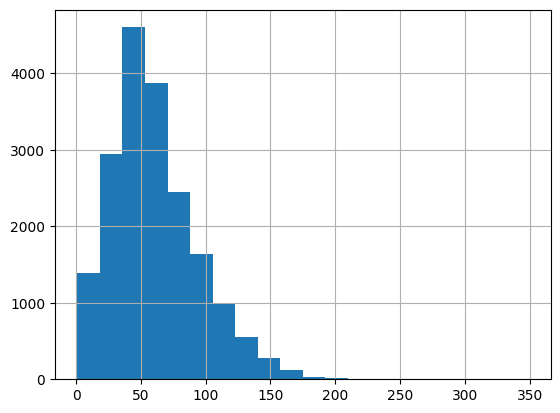

In [98]:
chess_games['turns'].hist(bins=20)

As partidas possuem uma mediana de 57 turnos, com uma média de 62.4 e um desvio padrão de 34.2 turnos.
Nota-se que poucas partidas ultrapassam a marca de 100 turnos, sendo mais comum haver partidas de duração média ou curtas.

In [99]:
chess_games[chess_games['turns'] < 4]['victory_status'].unique()

['resign', 'draw', 'outoftime']
Categories (4, object): ['draw', 'mate', 'outoftime', 'resign']

Algo interessante de se notar é que as condições de vitória de partidas com menos de 4 turnos não inclui mates, o que é esperado, já que existem poucas formas de se vencer uma partida dessa maneira em tão poucos turnos.

## Distribuição dos ratings de todos os jogadores

In [100]:
all_ratings = pd.concat([chess_games['white_rating'], chess_games['black_rating']])

In [101]:
all_ratings.describe()

count    37842.000000
mean      1594.606945
std        289.481445
min        784.000000
25%       1400.000000
50%       1566.000000
75%       1789.000000
max       2723.000000
dtype: float64

<Axes: >

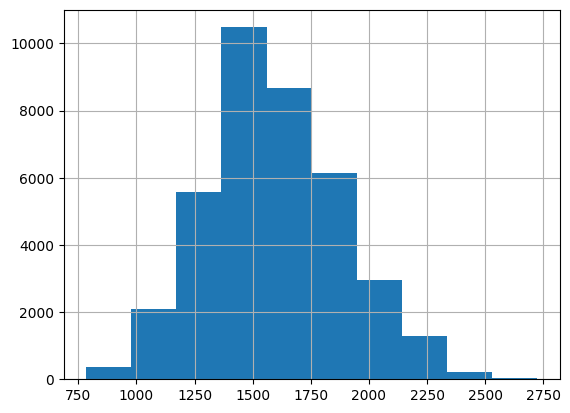

In [102]:
all_ratings.hist()

Os ratings dos jogadores se concentram em torno da mediana 1591, com uma média próxima de 1603.65 e um desvio padrão de 240.64. Os ratings seguem uma distribuição aparentemente normal, com poucos jogadores com ratings muito altos ou muito baixos.

## Vitórias

<Axes: xlabel='victory_status'>

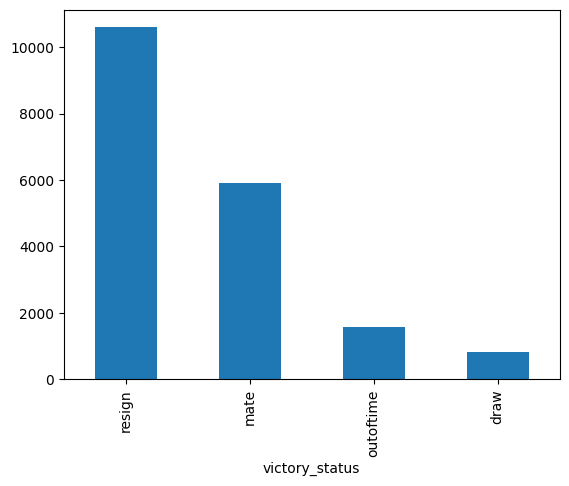

In [103]:
chess_games['victory_status'].value_counts().plot.bar()

Analisando as estatísticas de vitórias, nota-se uma alta taxa de desistências, sendo essa a principal forma de vitória, com quase o dobro de ocorrências da segunda principal forma de vitória, o mate.

<Axes: xlabel='winner'>

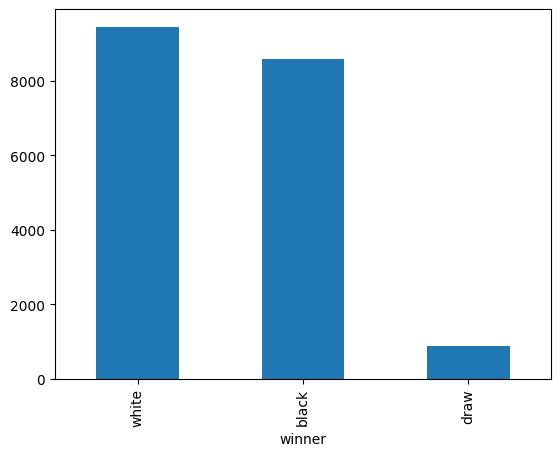

In [104]:
chess_games['winner'].value_counts().plot.bar()

Já ao analisar quem venceu cada partida, percebe-se uma tendência de vitória para o jogador que inicia com as peças brancas. Isso é esperado, já que o jogador que inicia tem uma pequena vantagem.